In [307]:
import requests
import re

from bs4 import BeautifulSoup



import numpy as np

import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt


from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer




import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import make_pipeline




from sklearn.linear_model import LogisticRegression


from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.naive_bayes import MultinomialNB

In [23]:

def get_links(url: str, header: dict) -> list:
    """
    Fetches the first 100 lyric links from the given URL.

    Args:
        url (str): The URL of the page to scrape.
        header (dict): Headers to use for the HTTP request.

    Returns:
        list: A list of up to 100 full URLs for lyrics.
    """
    response = requests.get(url, headers=header)
    response.raise_for_status() 
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find and filter lyric links
    song_links = []
    for a_tag in soup.find_all('a', href=True):
        href = a_tag['href']
        if re.match(r'^/lyric/\d+/[^/]+/[^/]+$', href):
            song_links.append(href) 

    full_links = [BASE_URL + link for link in song_links]
    link_100=full_links[:100]

    return link_100


In [41]:
BASE_URL = "https://www.lyrics.com"
url = 'https://www.lyrics.com/artist/Madonna/64565'
header = {'User-agent': 'Mozilla/5.0 (X11; Linux i686; rv:2.0b10) Gecko/20100101 Firefox/4.0b10'}
links_madonna = get_links(url, header)

In [50]:
BASE_URL = "https://www.lyrics.com"
url = "https://www.lyrics.com/artist/Red-Hot-Chili-Peppers/5241"
header = {'User-agent': 'Mozilla/5.0 (X11; Linux i686; rv:2.0b10) Gecko/20100101 Firefox/4.0b10'}
links_rhcp = get_links(url, header)

In [47]:
def clean_corpus(links: list, header: dict) -> list:
    """
    Cleans the lyrics from the given song links.

    Args:
        links (list): A list of URLs for songs to scrape lyrics from.
        header (dict): Headers to use for the HTTP request.

    Returns:
        list: A list of cleaned lyric texts.
    """
    corpus = []  # To store the raw HTML content of each page
    
    # Loop through each song link and fetch its content
    for song in links:
        response = requests.get(song, headers=header)
        corpus.append(response.text)  # Append the raw HTML of the song's page
    
    # List to store cleaned lyrics
    lyric_texts = []

    # Loop through the raw HTML content (corpus) of each song
    for page_content in corpus:
        soup = BeautifulSoup(page_content, 'html.parser')
        
        # Find and filter <pre> elements with the class 'lyric-body'
        lyric_elements = soup.find_all('pre', class_='lyric-body')
        
        # Loop through each lyric element and clean its text
        for element in lyric_elements:
            lyric_text = element.get_text()

            # Clean unwanted escape sequences like '\\r' and '\\n'
            cleaned_lyric_text = lyric_text.replace("\\r\\n", " ")  # Replace escaped line breaks with a space
            cleaned_lyric_text = cleaned_lyric_text.replace("\\r", "")  # Remove carriage returns
            cleaned_lyric_text = cleaned_lyric_text.replace("\\n", "")  # Remove new lines
            cleaned_lyric_text = cleaned_lyric_text.replace("\\", "")  # Remove extra backslashes

            
            cleaned_lyric_text = ' '.join(cleaned_lyric_text.split())

           
            lyric_texts.append(cleaned_lyric_text.strip())  # Strip to remove leading/trailing spaces

    return lyric_texts


In [48]:
madonna = clean_corpus(links_madonna, header)

In [57]:
madonna 

["I have a tale to tell Sometimes it gets so hard to hide it well I was not ready for the fall Too blind to see the writing on the wall A man can tell a thousand lies I've learned my lesson well Hope I live to tell The secret I have learned, 'til then It will burn inside of me I know where beauty lives I've seen it once, I know the warm she gives The light that you could never see It shines inside, you can't take that from me A man can tell a thousand lies I've learned my lesson well Hope I live to tell The secret I have learned, 'til then It will burn inside of me The truth is never far behind You kept it hidden well If I live to tell The secret I knew then Will I ever have the chance again If I ran away, I'd never have the strength To go very far How would they hear the beating of my heart Will it grow cold The secret that I hide, will I grow old How will they hear When will they learn How will they know A man can tell a thousand lies I've learned my lesson well Hope I live to tell T

In [70]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt_tab')

from nltk.corpus import stopwords

nltk.download('stopwords')

from nltk import FreqDist


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/saramaras/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saramaras/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
sentences = [sent_tokenize(text) for text in madonna]

In [65]:
# Tokenize into words
words = [word_tokenize(text) for text in madonna]

In [78]:
stop_words = set(stopwords.words('english'))

In [79]:
# Now filter the words (remove stopwords and non-alphabetic words)
filtered_words = [
    [word for word in word_list if word.lower() not in stop_words and word.isalpha()]
    for word_list in words  # words is already tokenized, so we work on it directly
]

In [82]:
# Removing stopwords from the tokenized words
filtered_words

[['tale',
  'tell',
  'Sometimes',
  'gets',
  'hard',
  'hide',
  'well',
  'ready',
  'fall',
  'blind',
  'see',
  'writing',
  'wall',
  'man',
  'tell',
  'thousand',
  'lies',
  'learned',
  'lesson',
  'well',
  'Hope',
  'live',
  'tell',
  'secret',
  'learned',
  'burn',
  'inside',
  'know',
  'beauty',
  'lives',
  'seen',
  'know',
  'warm',
  'gives',
  'light',
  'could',
  'never',
  'see',
  'shines',
  'inside',
  'ca',
  'take',
  'man',
  'tell',
  'thousand',
  'lies',
  'learned',
  'lesson',
  'well',
  'Hope',
  'live',
  'tell',
  'secret',
  'learned',
  'burn',
  'inside',
  'truth',
  'never',
  'far',
  'behind',
  'kept',
  'hidden',
  'well',
  'live',
  'tell',
  'secret',
  'knew',
  'ever',
  'chance',
  'ran',
  'away',
  'never',
  'strength',
  'go',
  'far',
  'would',
  'hear',
  'beating',
  'heart',
  'grow',
  'cold',
  'secret',
  'hide',
  'grow',
  'old',
  'hear',
  'learn',
  'know',
  'man',
  'tell',
  'thousand',
  'lies',
  'learned',


In [83]:
# Flatten the filtered_words list into a single list of words
flat_filtered_words = [word for word_list in filtered_words for word in word_list]

In [94]:

fdist = FreqDist(flat_filtered_words)

# Print the most common words
print("\nMost Common Words:")
most_common_words = fdist.most_common(50)
most_common_words


Most Common Words:


[('love', 471),
 ('like', 343),
 ('know', 284),
 ('na', 261),
 ('gon', 189),
 ('get', 189),
 ('baby', 161),
 ('got', 137),
 ('want', 136),
 ('world', 130),
 ('material', 126),
 ('take', 123),
 ('make', 113),
 ('go', 112),
 ('la', 112),
 ('burning', 108),
 ('one', 107),
 ('oh', 105),
 ('ca', 101),
 ('girl', 101),
 ('come', 100),
 ('let', 100),
 ('true', 99),
 ('time', 94),
 ('never', 92),
 ('heart', 91),
 ('yeah', 91),
 ('prayer', 91),
 ('think', 88),
 ('Yeah', 82),
 ('Oh', 80),
 ('see', 76),
 ('Burning', 72),
 ('feel', 71),
 ('two', 69),
 ('last', 68),
 ('everyone', 67),
 ('future', 67),
 ('One', 66),
 ('way', 64),
 ('rise', 61),
 ('call', 61),
 ('True', 60),
 ('Living', 58),
 ('te', 57),
 ('give', 53),
 ('bottles', 53),
 ('save', 53),
 ('right', 52),
 ('might', 52)]

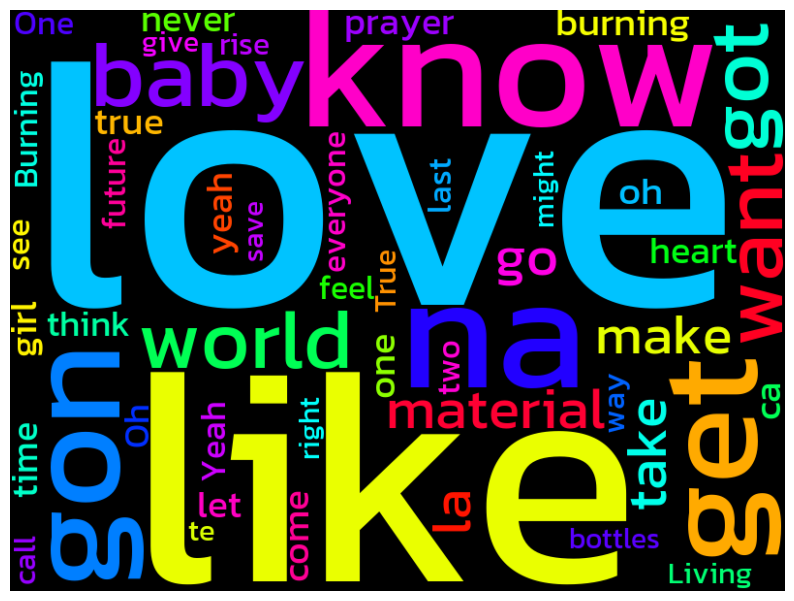

In [356]:
font_path = '/Users/saramaras/Documents/github/text_classification/Kanit/Kanit-Regular.ttf'




# Convert the list of tuples to a dictionary
word_freq = dict(most_common_words)


# Custom color function for the word cloud
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl({}, 100%, 50%)".format(np.random.randint(0, 360))  # Random hue

# Create the word cloud
wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=600,
    prefer_horizontal=0.5,
    background_color="black",  # Set background color
    color_func=color_func,  # Pass the custom color function
    random_state=42
).generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()


In [355]:
rhcp = clean_corpus(links_rhcp, header)

In [259]:
rhcp

["Me and my, me and my, me and my, me and my, me and my friends Me and my, me and my, me and my, me and my, me and my friends Me and my, me and my, me and my, me and my, me and my friends Me and my, me and my, me and my, me and my, me and my friends Like two sweet peas in an even sweeter pod That's my friend and my friend's named Bob Like the devil knows hell I know Bob well Well enough to tell you 'bout his '67 smells Well enough to tell you he's a hell-a-swell fellow Well enough to tell you that we know each other better Than we know our selves like freaks of a feather We rock together I know Bob well But I think he knows me better Me and my, me and my, me and my, me and my, me and my friends Me and my, me and my, me and my, me and my, me and my friends Me and my, me and my, me and my, me and my, me and my friends Me and my, me and my, me and my, me and my, me and my friends He's as close to me as a friend can be I'll be standin' by my buddy he'll be standin' by me Just another half 

In [260]:
sentences_rchp = [sent_tokenize(text) for text in rhcp]

In [261]:
# Tokenize into words
words_rhcp = [word_tokenize(text) for text in rhcp]

In [262]:
# Now filter the words (remove stopwords and non-alphabetic words)
filtered_words_rhcp = [
    [word for word in word_list if word.lower() not in stop_words and word.isalpha()]
    for word_list in words_rhcp  # words is already tokenized, so we work on it directly
]

In [263]:
filtered_words_rhcp

[['friends',
  'friends',
  'friends',
  'friends',
  'Like',
  'two',
  'sweet',
  'peas',
  'even',
  'sweeter',
  'pod',
  'friend',
  'friend',
  'named',
  'Bob',
  'Like',
  'devil',
  'knows',
  'hell',
  'know',
  'Bob',
  'well',
  'Well',
  'enough',
  'tell',
  'smells',
  'Well',
  'enough',
  'tell',
  'fellow',
  'Well',
  'enough',
  'tell',
  'know',
  'better',
  'know',
  'selves',
  'like',
  'freaks',
  'feather',
  'rock',
  'together',
  'know',
  'Bob',
  'well',
  'think',
  'knows',
  'better',
  'friends',
  'friends',
  'friends',
  'friends',
  'close',
  'friend',
  'standin',
  'buddy',
  'standin',
  'another',
  'half',
  'two',
  'headed',
  'freak',
  'need',
  'like',
  'heart',
  'needs',
  'beat',
  'point',
  'friendly',
  'verse',
  'got',
  'sing',
  'little',
  'something',
  'rehearsed',
  'man',
  'name',
  'Hillel',
  'love',
  'soul',
  'brother',
  'sacred',
  'take',
  'huckleberry',
  'Slim',
  'boy',
  'take',
  'friends',
  'friends',
 

In [264]:

# Flatten the filtered_words list into a single list of words
flat_filtered_words_rhcp = [word for word_list in filtered_words_rhcp for word in word_list]


fdist = FreqDist(flat_filtered_words_rhcp)

# Print the most common words
print("\nMost Common Words:")

most_common_words_rhcp


Most Common Words:


[('got', 200),
 ('away', 188),
 ('love', 161),
 ('know', 158),
 ('give', 144),
 ('want', 115),
 ('yeah', 115),
 ('Take', 102),
 ('keep', 93),
 ('time', 85),
 ('see', 82),
 ('like', 80),
 ('go', 77),
 ('get', 74),
 ('na', 73),
 ('friends', 72),
 ('yea', 72),
 ('never', 67),
 ('little', 66),
 ('Give', 66),
 ('Like', 64),
 ('aw', 64),
 ('could', 58),
 ('said', 56),
 ('make', 55),
 ('girl', 55),
 ('One', 54),
 ('life', 53),
 ('world', 52),
 ('baby', 50),
 ('say', 50),
 ('way', 50),
 ('feel', 49),
 ('gon', 49),
 ('Hollywood', 48),
 ('aeroplane', 48),
 ('back', 47),
 ('take', 44),
 ('getting', 44),
 ('ca', 43),
 ('mind', 43),
 ('inside', 43),
 ('ground', 43),
 ('well', 41),
 ('big', 41),
 ('kiss', 41),
 ('oh', 40),
 ('Oh', 40),
 ('man', 38),
 ('right', 37)]

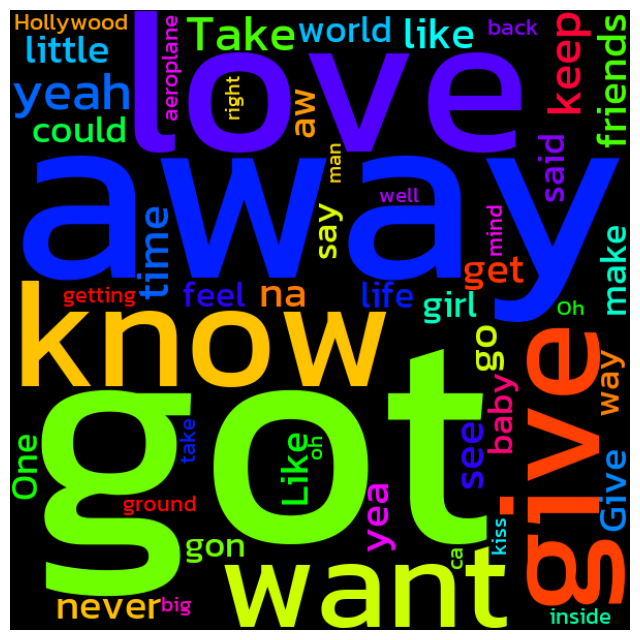

In [357]:


# Convert the list of tuples to a dictionary
word_freq = dict(most_common_words_rhcp)


# Create the word cloud
wordcloud = WordCloud(
    font_path=font_path,
    width=600,
    height=600,
    background_color="black",  # Set background to None
    random_state=42,
    colormap = 'YlOrRd',
    prefer_horizontal=0.5,
    color_func=color_func, 
    contour_width = 1,

).generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(8, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()




# Create a feature matrix

In [323]:
filtered_words_rhcp
flattened_list = [item for sublist in filtered_words_rhcp for item in sublist]

In [324]:
# Now filter the words (remove stopwords and non-alphabetic words)


filtered_words_rhcp_new = []
#force string data to lower case
for str in flattened_list:
    filtered_words_rhcp_new.append(str.lower())

In [325]:
filtered_words_rhcp_new

['friends',
 'friends',
 'friends',
 'friends',
 'like',
 'two',
 'sweet',
 'peas',
 'even',
 'sweeter',
 'pod',
 'friend',
 'friend',
 'named',
 'bob',
 'like',
 'devil',
 'knows',
 'hell',
 'know',
 'bob',
 'well',
 'well',
 'enough',
 'tell',
 'smells',
 'well',
 'enough',
 'tell',
 'fellow',
 'well',
 'enough',
 'tell',
 'know',
 'better',
 'know',
 'selves',
 'like',
 'freaks',
 'feather',
 'rock',
 'together',
 'know',
 'bob',
 'well',
 'think',
 'knows',
 'better',
 'friends',
 'friends',
 'friends',
 'friends',
 'close',
 'friend',
 'standin',
 'buddy',
 'standin',
 'another',
 'half',
 'two',
 'headed',
 'freak',
 'need',
 'like',
 'heart',
 'needs',
 'beat',
 'point',
 'friendly',
 'verse',
 'got',
 'sing',
 'little',
 'something',
 'rehearsed',
 'man',
 'name',
 'hillel',
 'love',
 'soul',
 'brother',
 'sacred',
 'take',
 'huckleberry',
 'slim',
 'boy',
 'take',
 'friends',
 'friends',
 'jacky',
 'eyes',
 'closed',
 'right',
 'course',
 'guided',
 'invisible',
 'force',
 'dr

In [326]:
filtered_words

[['tale',
  'tell',
  'Sometimes',
  'gets',
  'hard',
  'hide',
  'well',
  'ready',
  'fall',
  'blind',
  'see',
  'writing',
  'wall',
  'man',
  'tell',
  'thousand',
  'lies',
  'learned',
  'lesson',
  'well',
  'Hope',
  'live',
  'tell',
  'secret',
  'learned',
  'burn',
  'inside',
  'know',
  'beauty',
  'lives',
  'seen',
  'know',
  'warm',
  'gives',
  'light',
  'could',
  'never',
  'see',
  'shines',
  'inside',
  'ca',
  'take',
  'man',
  'tell',
  'thousand',
  'lies',
  'learned',
  'lesson',
  'well',
  'Hope',
  'live',
  'tell',
  'secret',
  'learned',
  'burn',
  'inside',
  'truth',
  'never',
  'far',
  'behind',
  'kept',
  'hidden',
  'well',
  'live',
  'tell',
  'secret',
  'knew',
  'ever',
  'chance',
  'ran',
  'away',
  'never',
  'strength',
  'go',
  'far',
  'would',
  'hear',
  'beating',
  'heart',
  'grow',
  'cold',
  'secret',
  'hide',
  'grow',
  'old',
  'hear',
  'learn',
  'know',
  'man',
  'tell',
  'thousand',
  'lies',
  'learned',


In [327]:
flattened_list_madd = [item for sublist in filtered_words for item in sublist]
flattened_list_madd 

['tale',
 'tell',
 'Sometimes',
 'gets',
 'hard',
 'hide',
 'well',
 'ready',
 'fall',
 'blind',
 'see',
 'writing',
 'wall',
 'man',
 'tell',
 'thousand',
 'lies',
 'learned',
 'lesson',
 'well',
 'Hope',
 'live',
 'tell',
 'secret',
 'learned',
 'burn',
 'inside',
 'know',
 'beauty',
 'lives',
 'seen',
 'know',
 'warm',
 'gives',
 'light',
 'could',
 'never',
 'see',
 'shines',
 'inside',
 'ca',
 'take',
 'man',
 'tell',
 'thousand',
 'lies',
 'learned',
 'lesson',
 'well',
 'Hope',
 'live',
 'tell',
 'secret',
 'learned',
 'burn',
 'inside',
 'truth',
 'never',
 'far',
 'behind',
 'kept',
 'hidden',
 'well',
 'live',
 'tell',
 'secret',
 'knew',
 'ever',
 'chance',
 'ran',
 'away',
 'never',
 'strength',
 'go',
 'far',
 'would',
 'hear',
 'beating',
 'heart',
 'grow',
 'cold',
 'secret',
 'hide',
 'grow',
 'old',
 'hear',
 'learn',
 'know',
 'man',
 'tell',
 'thousand',
 'lies',
 'learned',
 'lesson',
 'well',
 'Hope',
 'live',
 'tell',
 'secret',
 'learned',
 'burn',
 'inside',
 't

In [328]:
# Now filter the words (remove stopwords and non-alphabetic words)


filtered_words_madd_new = []
#force string data to lower case
for str in flattened_list:
    filtered_words_madd_new.append(str.lower())

In [329]:

# corpus
CORPUS_1 = filtered_words_rhcp_new 

CORPUS_2 = filtered_words_madd_new

In [330]:
from sklearn.feature_extraction.text import CountVectorizer

In [331]:
tfidf = TfidfVectorizer(lowercase=True,  ngram_range=(1,1))

In [332]:
X_tf = tfidf.fit_transform(CORPUS_1)
df_tf = pd.DataFrame(X_tf.toarray(), columns=tfidf.get_feature_names_out())

In [333]:
df_tf

,abdul,ability,ablaze,abnormalities,aboard,aborigine,account,action,addicted,admire,...,yet,yo,young,zanniest,zap,zen,zing,zodiac,zone,zulu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [334]:
X_tf2 = tfidf.fit_transform(CORPUS_2)
df_tf2 = pd.DataFrame(X_tf2.toarray(), columns=tfidf.get_feature_names_out())

In [338]:
df_tf2['label'] = "madonna"

In [344]:
df_tf2 

,abdul,ability,ablaze,abnormalities,aboard,aborigine,account,action,addicted,admire,...,yo,young,zanniest,zap,zen,zing,zodiac,zone,zulu,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,madonna
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,madonna
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,madonna
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,madonna
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,madonna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,madonna
13266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,madonna
13267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,madonna
13268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,madonna


In [346]:
df_tf['label'] = "rhcp"

In [347]:
df_tf

,abdul,ability,ablaze,abnormalities,aboard,aborigine,account,action,addicted,admire,...,yo,young,zanniest,zap,zen,zing,zodiac,zone,zulu,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rhcp
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rhcp
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rhcp
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rhcp
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rhcp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rhcp
13266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rhcp
13267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rhcp
13268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rhcp


In [351]:
df_merged = pd.concat([df_tf, df_tf2], ignore_index=True)

In [352]:
df_merged 

,abdul,ability,ablaze,abnormalities,aboard,aborigine,account,action,addicted,admire,...,yo,young,zanniest,zap,zen,zing,zodiac,zone,zulu,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rhcp
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rhcp
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rhcp
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rhcp
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rhcp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,madonna
26536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,madonna
26537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,madonna
26538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,madonna


# Train test split df_merged, Train a model,